<a href="https://colab.research.google.com/github/HazemHassine/Machine-Learning-Components/blob/master/LinearRegression_GradientDescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [51]:
class linear_regression:
  
  # initialization
  def __init__(self):
    return
  
  # sum of squares error function
  def sse(self,y_true, y_pred):
    return np.sum((y_true-y_pred)**2)/(len(y_true) *2)

  # predict a value
  def predict_data(self,X,w,b):
    return X * w + b

  # gradient function at a certain point for the bias and the weights
  # formulas from this article https://www.analyticsvidhya.com/blog/2021/04/gradient-descent-in-linear-regression/
  def compute_gradient(self,X,Y,w,b):
    n = len(X)
    d = 1
    dj_dw = np.zeros((d,))
    dj_db = 0.
    for i in range(n):
      # err = X[i]*w+b - Y[i]
      # calculating the derivative of the loss function by the bias one time for each sample
      dj_db += Y[i] - (X[i]*w + b)
      # the dervivative of the loss function by the weights depends on the on all the samples for each point
      # for j in range (n):
      dj_dw += X[i] * (Y[i]-(X[i]*w+b))
    # dj_db = (-2/n) * self.sse(Y,self.predict_data(X,w,b))
    dj_dw *= (-2/n)
    dj_db *= (-2/n)
    
    return dj_db, dj_dw

     
  # gradient descent iterative function
  def train(self, X,Y, alpha=0.01,iter=20):
    self.w = 0
    self.b = 0.
    
    # these values are just to keep track
    hist = []
    w = []
    b = []
    for i in range(iter+1):
      # calculating the gradient at a certain point
      dj_db, dj_dw = self.compute_gradient(X,Y,self.w,self.b)
      self.w = self.w - alpha * dj_dw
      self.b = self.b - alpha * dj_db
      # appending current values (weight, bias, and the current loss)
      if (i % 10) == 0:
        w.append(self.w)
        b.append(self.b)
        hist.append(self.sse(Y,X*self.w+self.b))
    return hist, w,b

    
  def line(self):
    return self.w, self.b 

In [52]:
X = []
for i in range(0,100):
  X.append(i/100)
Y = []
for x in X:
  Y.append((x*1.3 + 5) * np.random.uniform(0.98,1.2))
X = np.array(X)
Y = np.array(Y)
clf = linear_regression()
hist,w,b = clf.train(X,Y,iter=200)

Text(0, 0.5, 'loss')

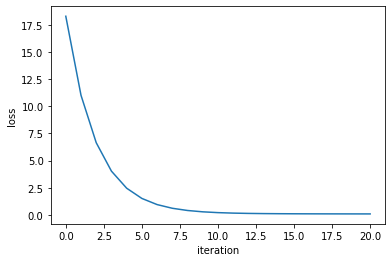

In [53]:
plt.plot(range(len(hist)),hist)
plt.xlabel("iteration")
plt.ylabel("loss")

[18.27947552520811, 11.004042499192737, 6.640828996551208, 4.023923102398587, 2.4541930166134454, 1.5124085810337464, 0.9471808295071916, 0.6077656743072714, 0.4037700774752038, 0.2809901206875947, 0.2069224622042767, 0.1620763768963772, 0.13476407785383032, 0.1179767667190007, 0.10751137756734977, 0.10084729097037684, 0.09647276276137073, 0.09348102127620393, 0.09132806953023065, 0.08968745270363311, 0.08836317024225598]


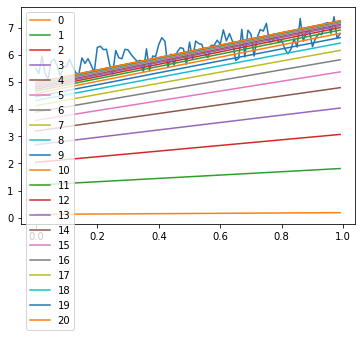

In [54]:
start = min(X)
end = max(X)
x= X
y = X * clf.w + clf.b
plt.plot(X,Y)
plt.plot(x,y,color="red")
print(hist)
for i in range(len(w)):
  y = X * w[i] + b[i]
  plt.plot(x,y,label=str(i))
plt.legend(loc="upper left")
plt.show()